# تمرین اول زهرا رجبی

## linear regression on House price prediction - SEATTLE dataset

In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
df = pd.read_csv('test.csv')

print('first 5 rows of the dataset')
print(df.head())

num_features = df.select_dtypes(include=['number'])
df = df.fillna(num_features.mean())
df = df.ffill()



first 5 rows of the dataset
   beds  baths    size size_units  lot_size lot_size_units  zip_code  \
0     3    3.0  2850.0       sqft   4200.00           sqft     98119   
1     4    5.0  3040.0       sqft   5002.00           sqft     98106   
2     3    1.0  1290.0       sqft   6048.00           sqft     98125   
3     3    2.0  2360.0       sqft      0.28           acre     98188   
4     3    3.5  1942.0       sqft   1603.00           sqft     98107   

       price  
0  1175000.0  
1  1057500.0  
2   799000.0  
3   565000.0  
4  1187000.0  


In [36]:
print(df['size'].describe())
print(df[df['size'] > 1e6])

count     505.000000
mean     1851.843564
std       922.556090
min       376.000000
25%      1171.000000
50%      1690.000000
75%      2400.000000
max      6139.000000
Name: size, dtype: float64
Empty DataFrame
Columns: [beds, baths, size, size_units, lot_size, lot_size_units, zip_code, price]
Index: []


In [37]:
# Data cleaning - removing outliers based on IQR
Q1_area = df['size'].quantile(0.25)
Q3_area = df['size'].quantile(0.75)
IQR_area = Q3_area - Q1_area

Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

lower_bound_area = Q1_area - 1.5 * IQR_area
upper_bound_area = Q3_area + 1.5 * IQR_area

lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

df_cleaned = df[(df['size'] >= lower_bound_area) & (df['size'] <= upper_bound_area) &
                (df['price'] >= lower_bound_price) & (df['price'] <= upper_bound_price)]

# Check the cleaned dataset
df_cleaned.describe()

,beds,baths,size,lot_size,zip_code,price
count,472.000000,472.000000,472.000000,472.000000,472.000000,4.720000e+02
mean,2.862288,2.125000,1733.362288,3976.915944,98124.773305,8.648122e+05
std,1.158417,0.947816,780.946903,2446.388382,23.974807,3.699750e+05
min,1.000000,1.000000,376.000000,0.230000,98101.000000,1.700000e+05
25%,2.000000,1.500000,1128.750000,1982.250000,98108.000000,5.964988e+05
50%,3.000000,2.000000,1640.000000,3994.459813,98118.000000,8.024750e+05
75%,4.000000,2.500000,2280.000000,5500.000000,98126.000000,1.050000e+06
max,7.000000,7.000000,4190.000000,9974.000000,98199.000000,1.950000e+06


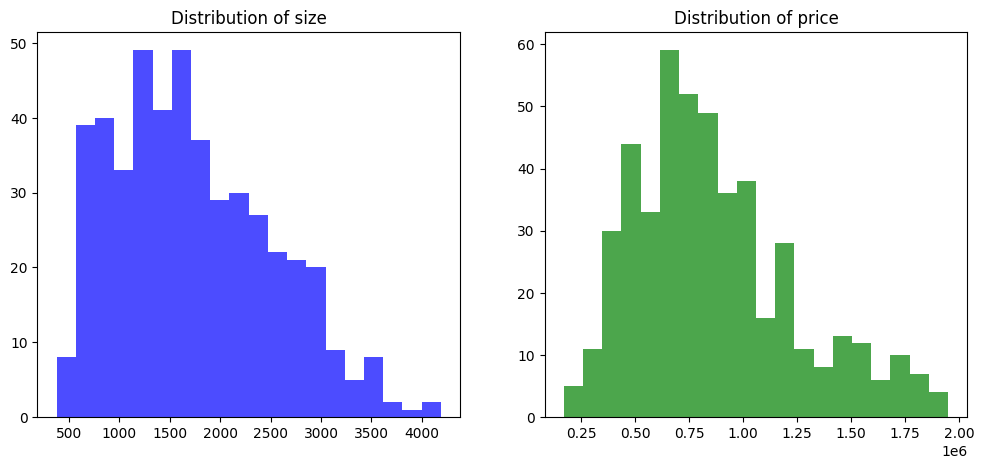

In [39]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df_cleaned['size'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of size')

plt.subplot(1, 2, 2)
plt.hist(df_cleaned['price'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of price')

plt.show()

In [40]:
# Function to compute the Root Mean Squared Error (RMSE)
def compute_rms_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Function to create polynomial features
def polynomial_features(X, degree):
    poly = PolynomialFeatures(degree=degree)
    return poly.fit_transform(X)

# Function to perform polynomial regression
def polynomial_regression(X, y, degree):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    return model

Processing zip_code: 98119


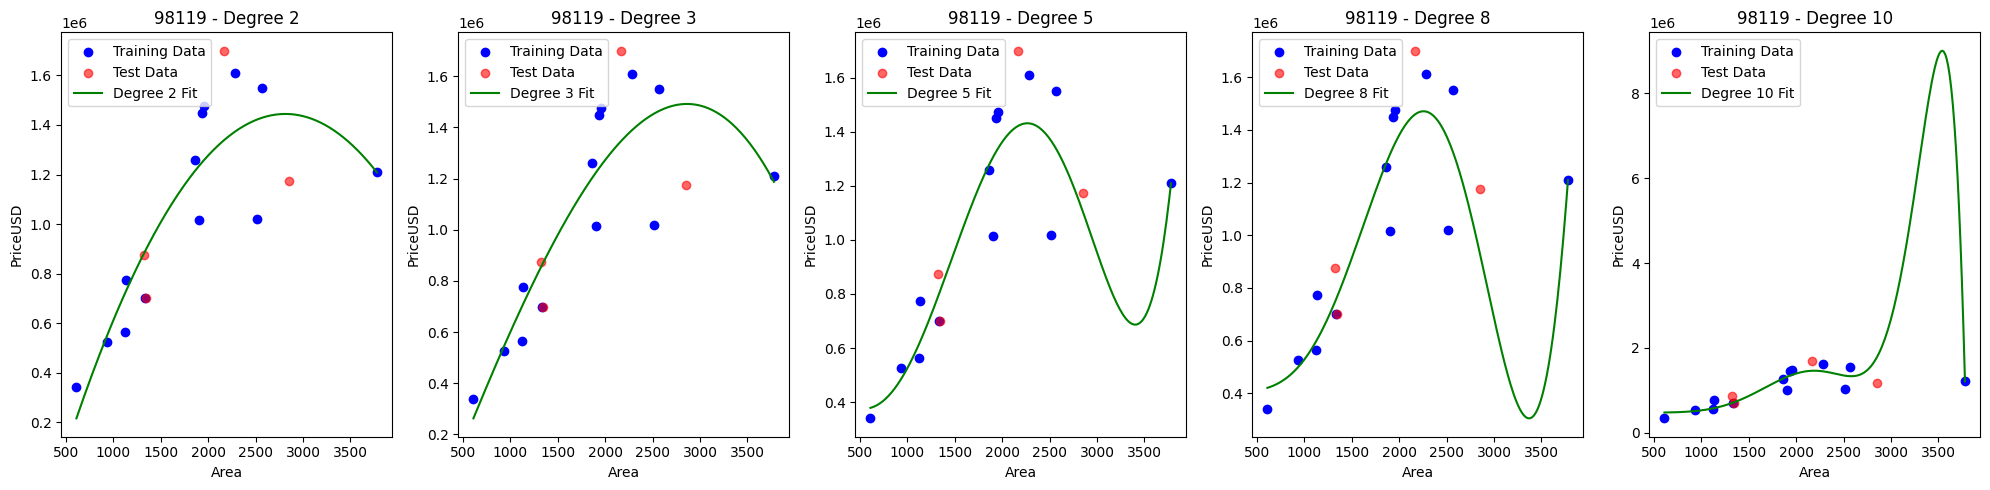

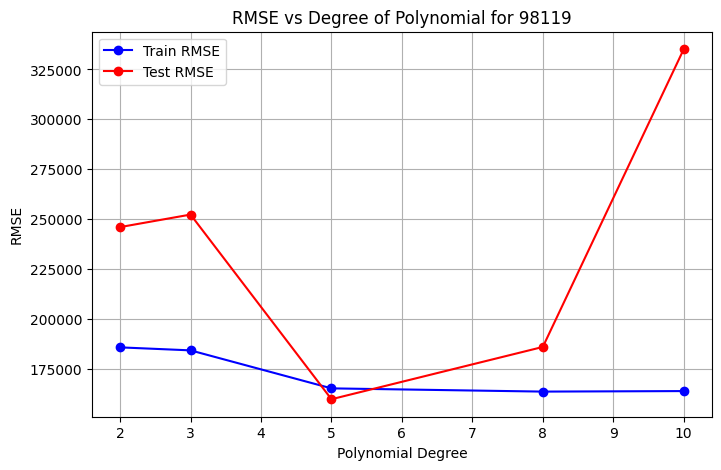

Processing zip_code: 98106


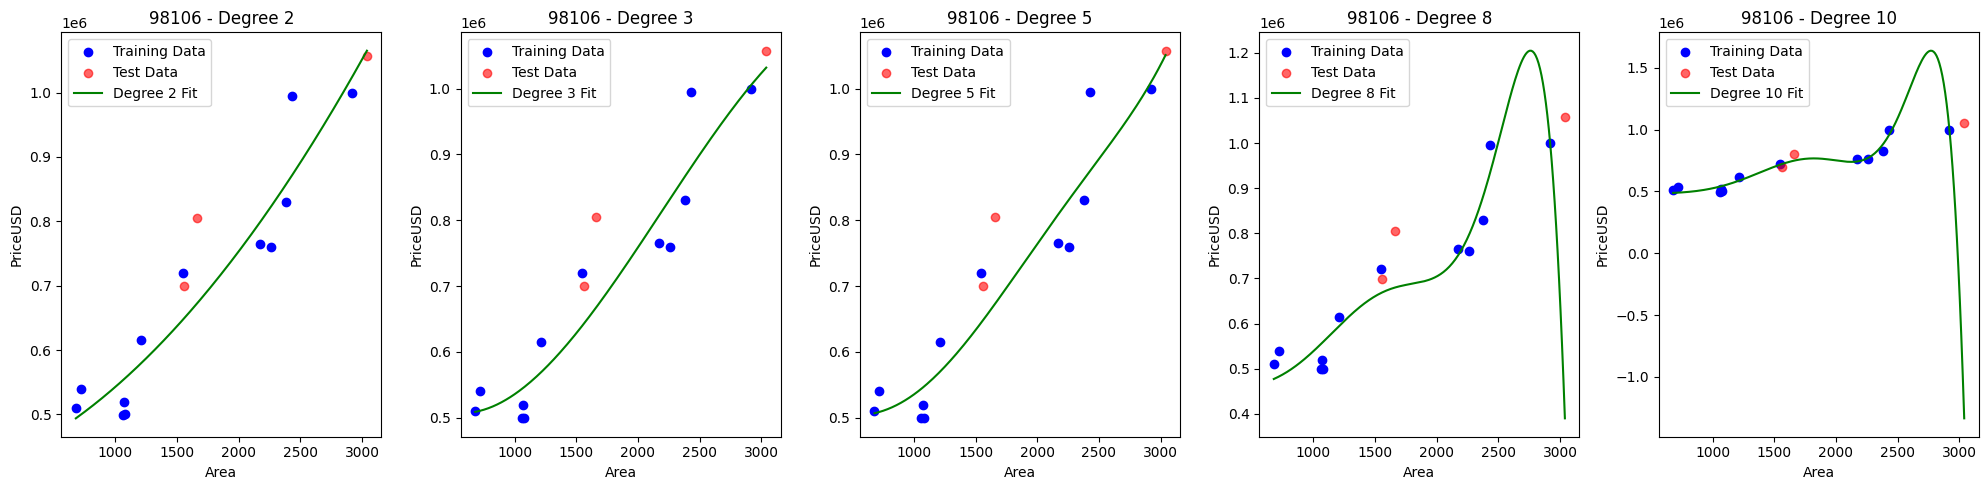

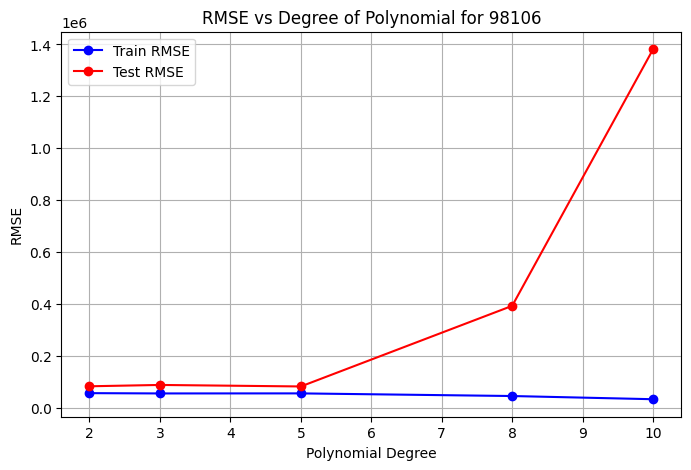

Processing zip_code: 98125


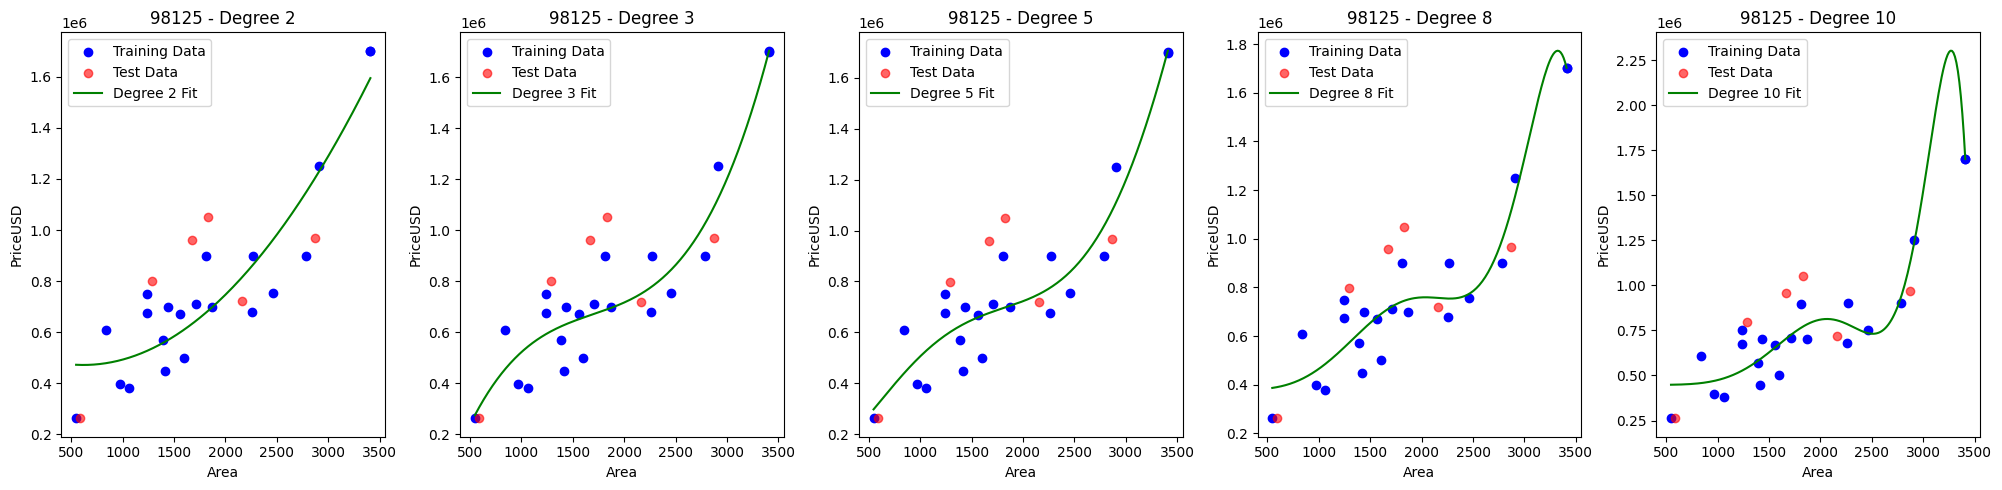

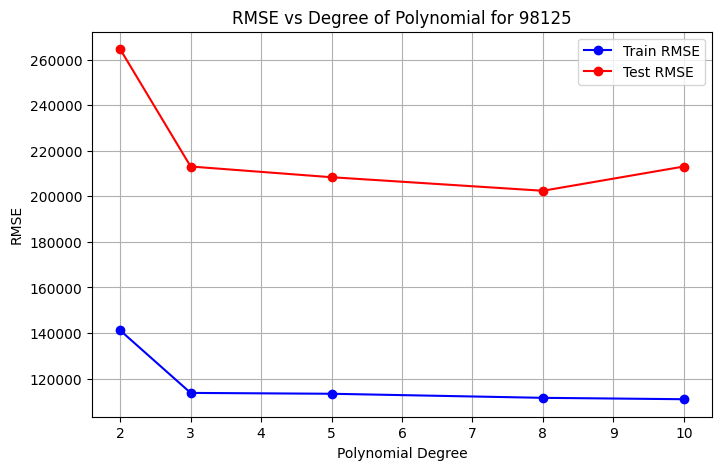

Skipping zip_code 98188 due to insufficient samples.
Processing zip_code: 98107


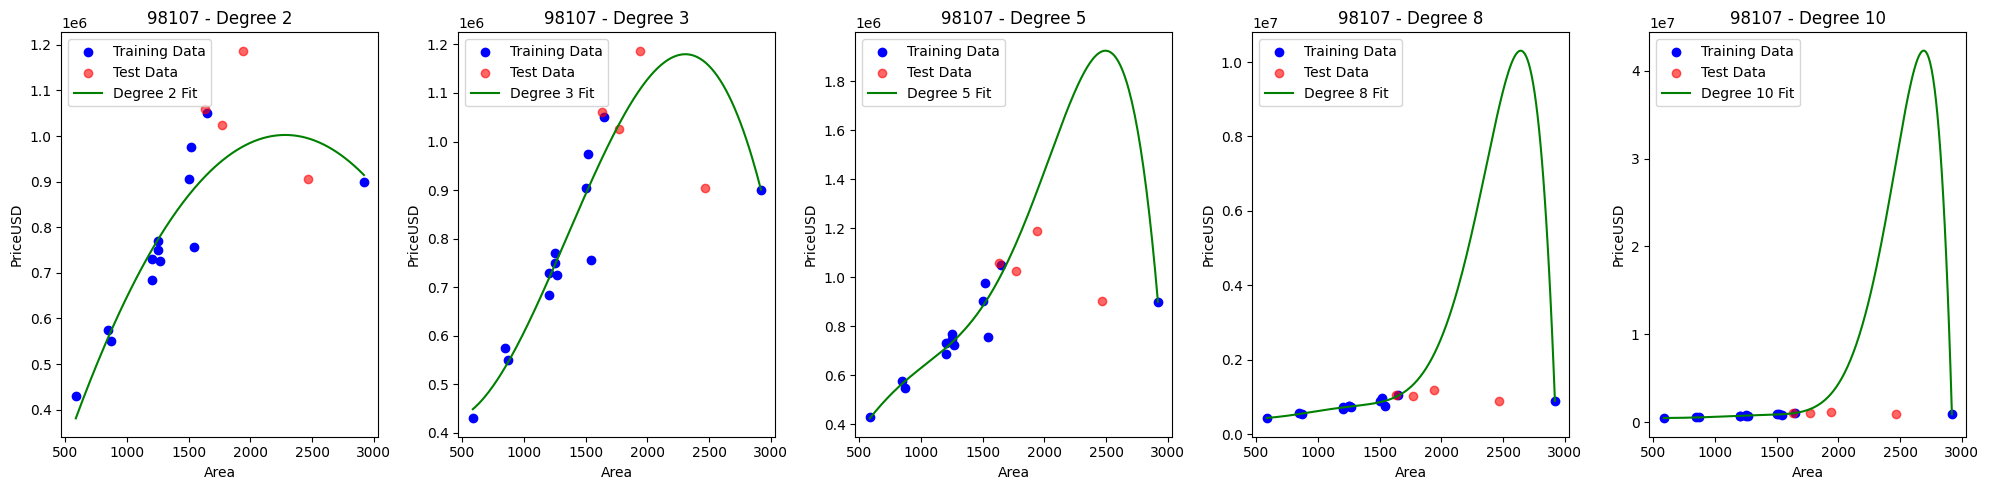

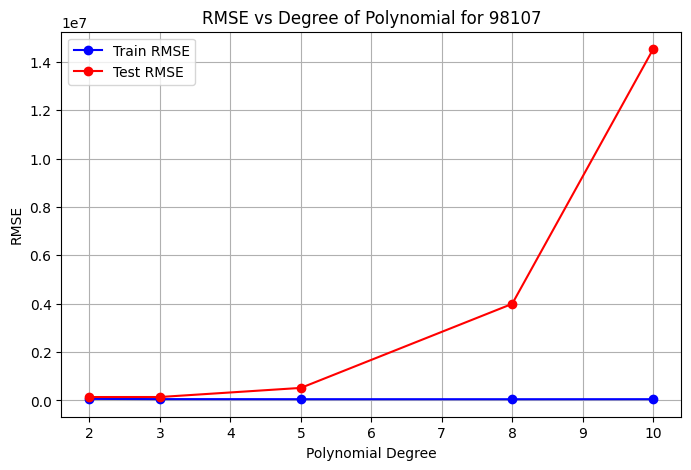

Processing zip_code: 98122


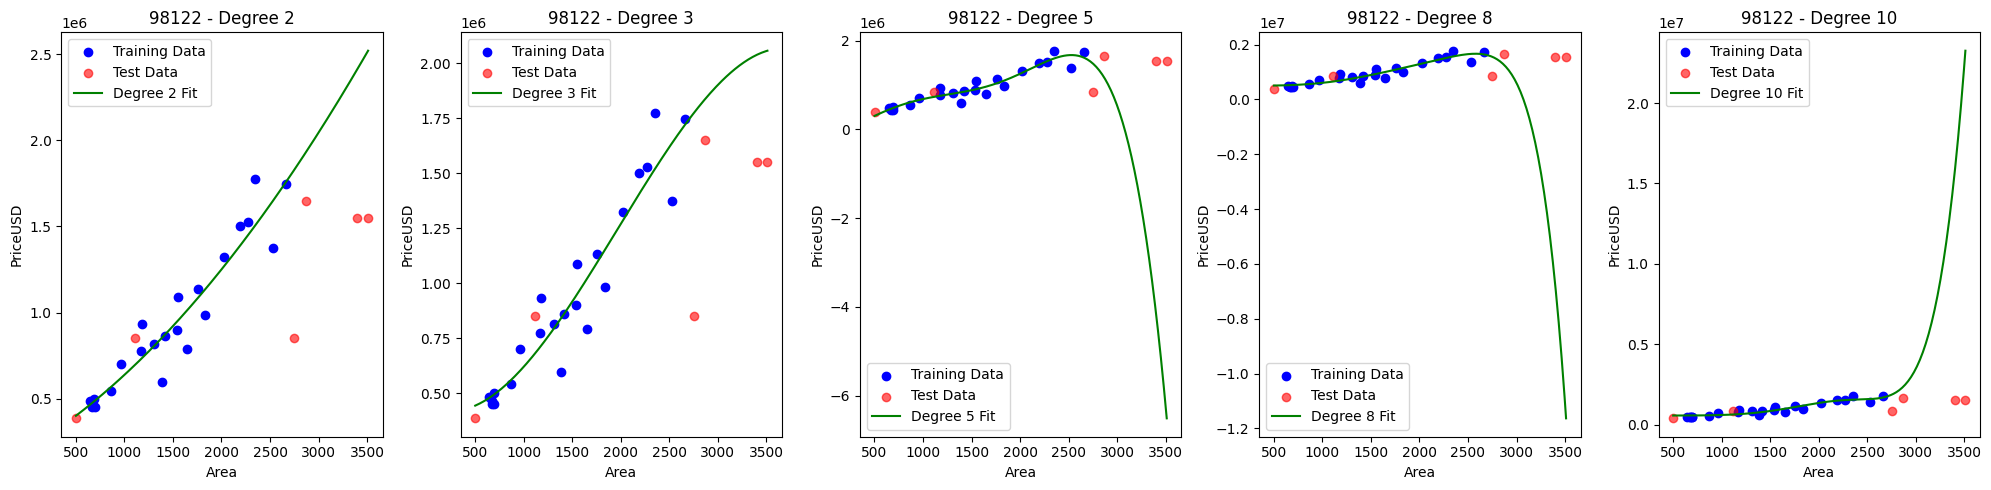

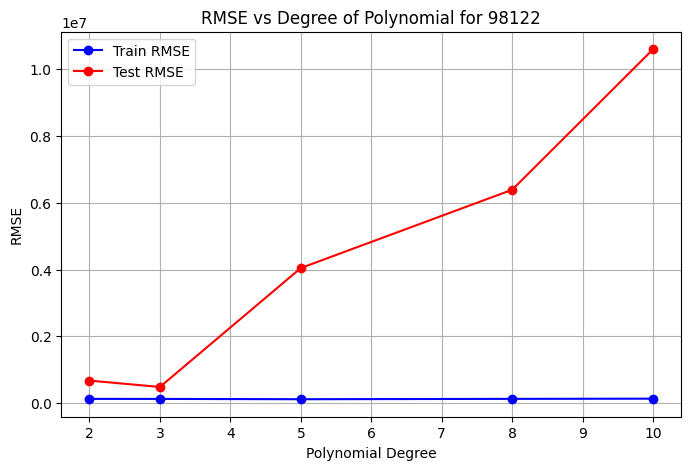

Processing zip_code: 98105


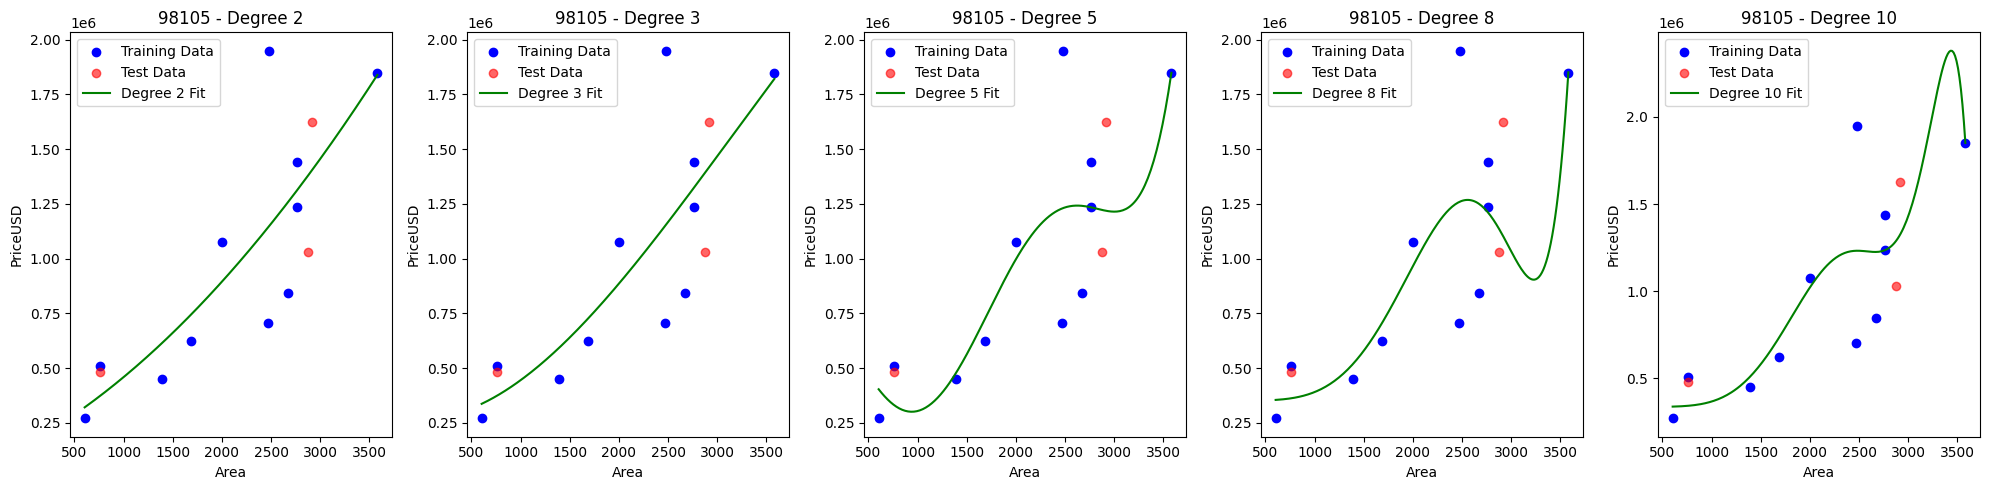

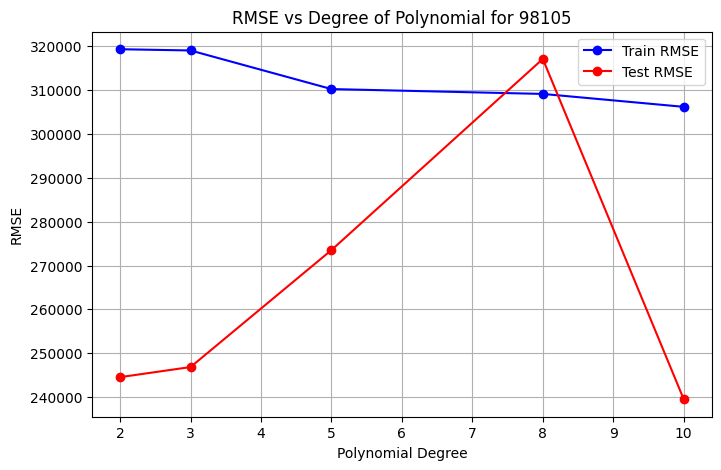

Processing zip_code: 98199


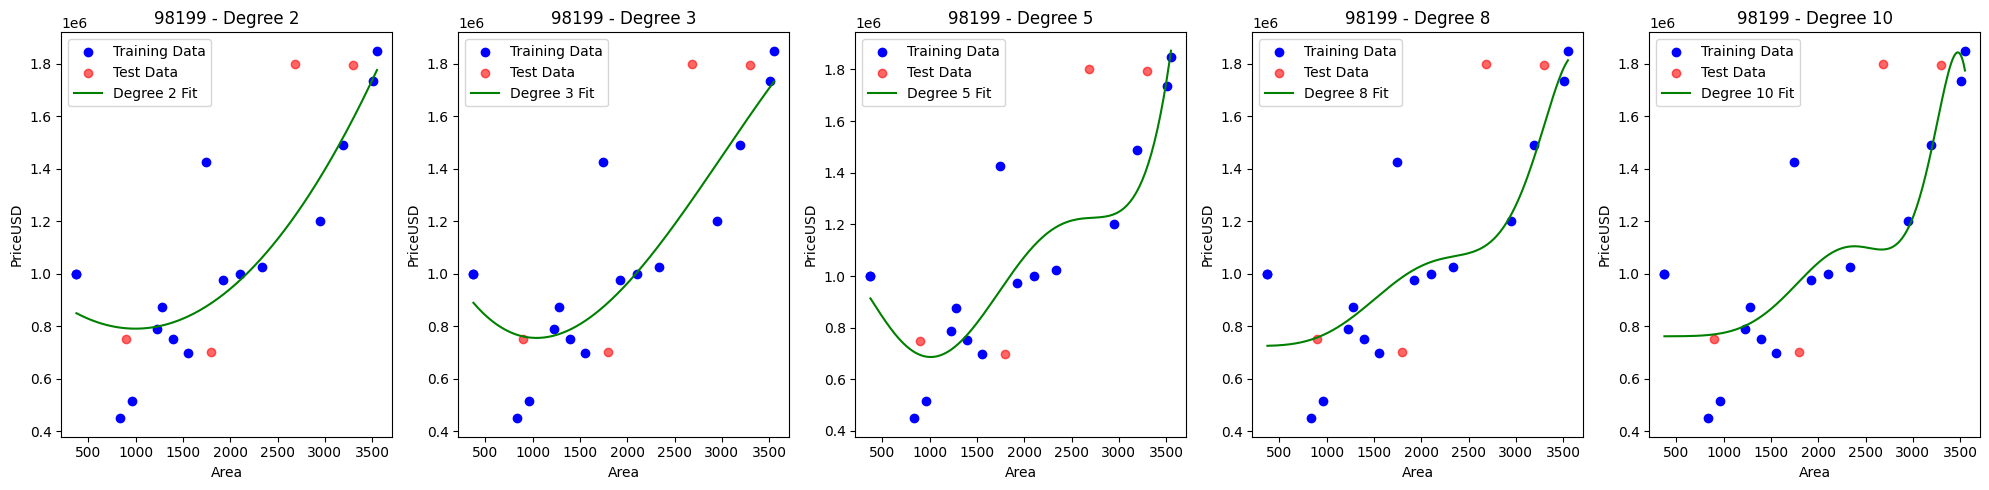

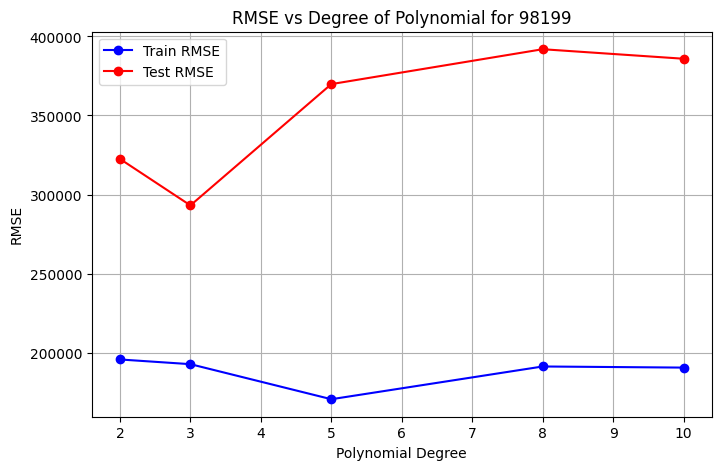

Processing zip_code: 98144


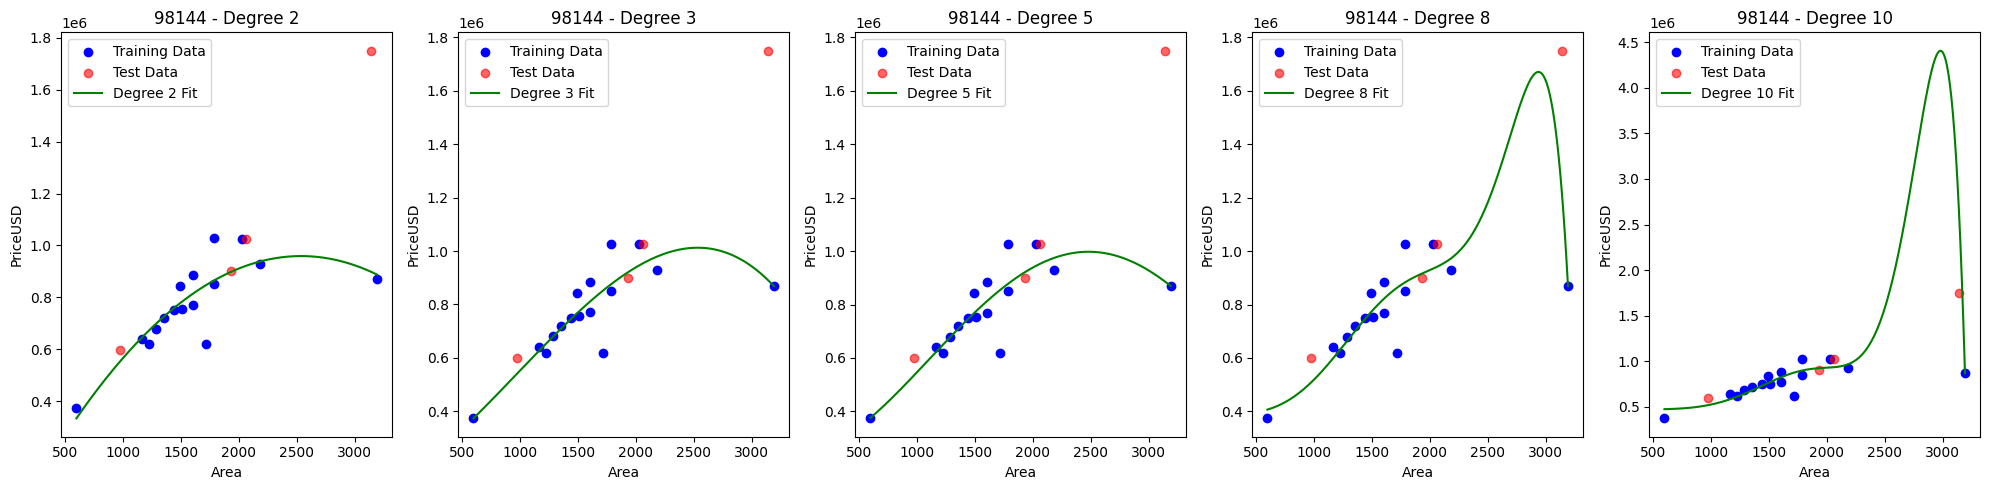

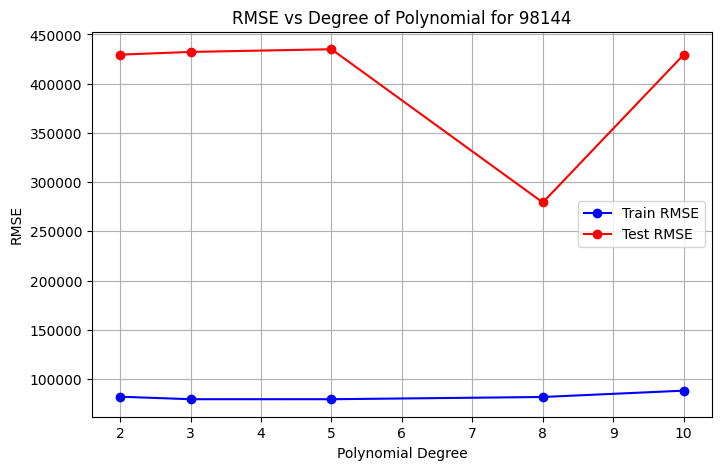

Processing zip_code: 98121


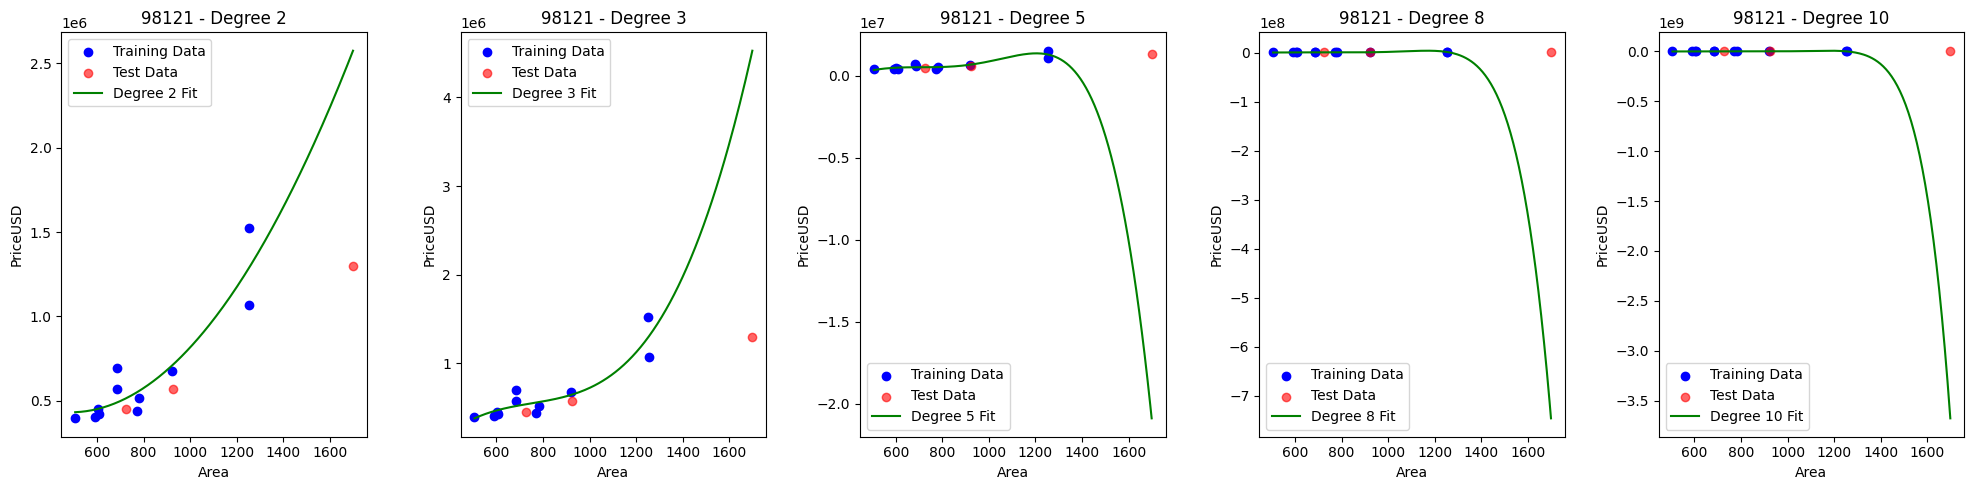

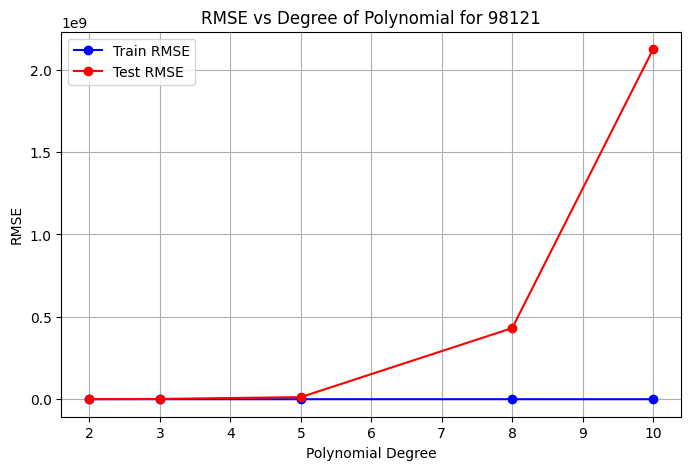

Processing zip_code: 98136


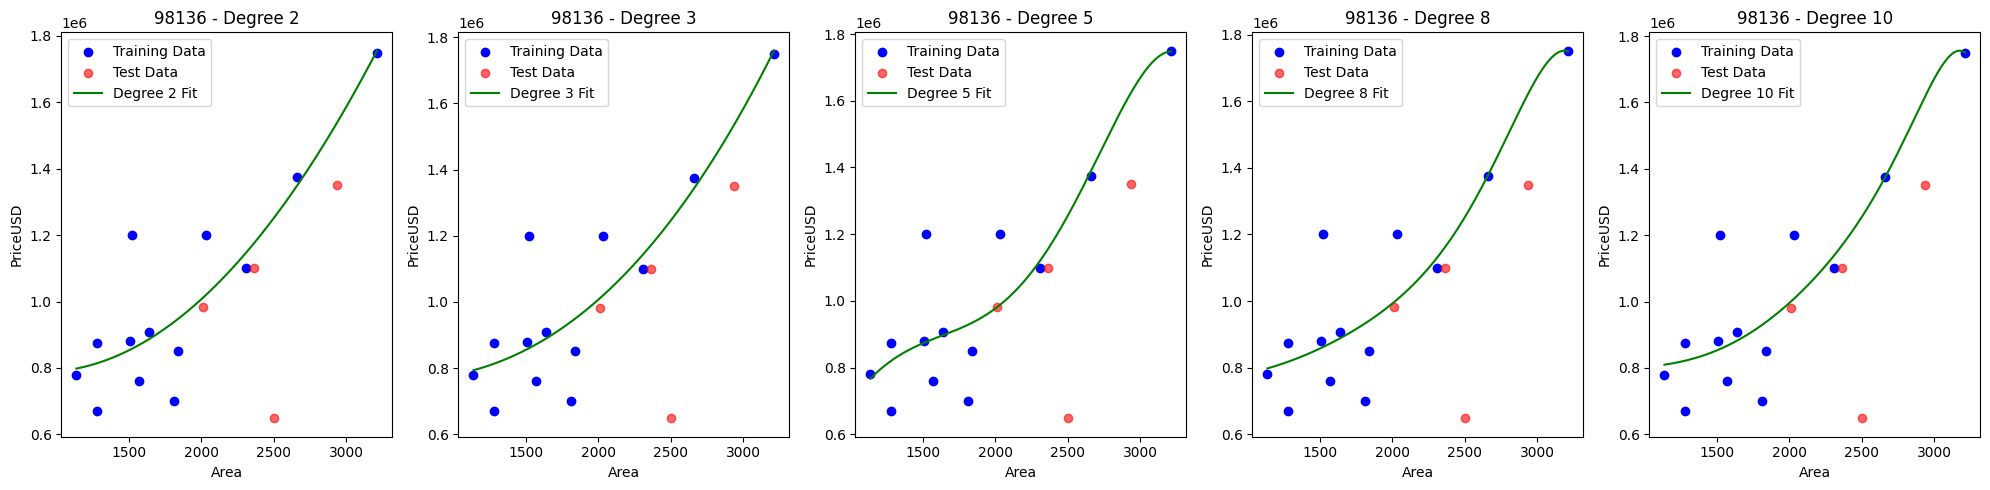

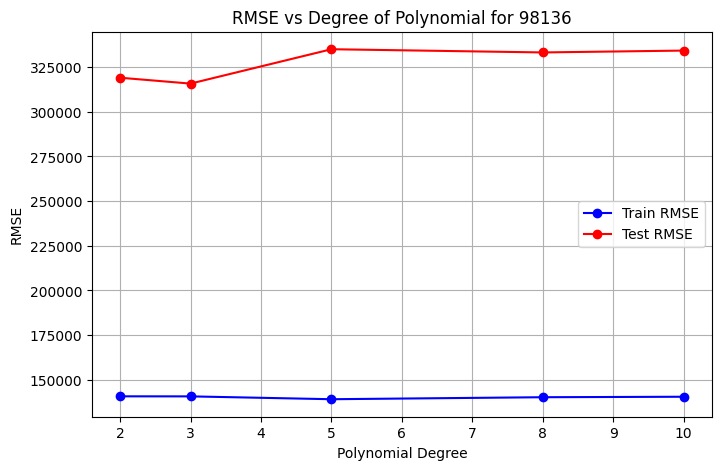

Processing zip_code: 98109


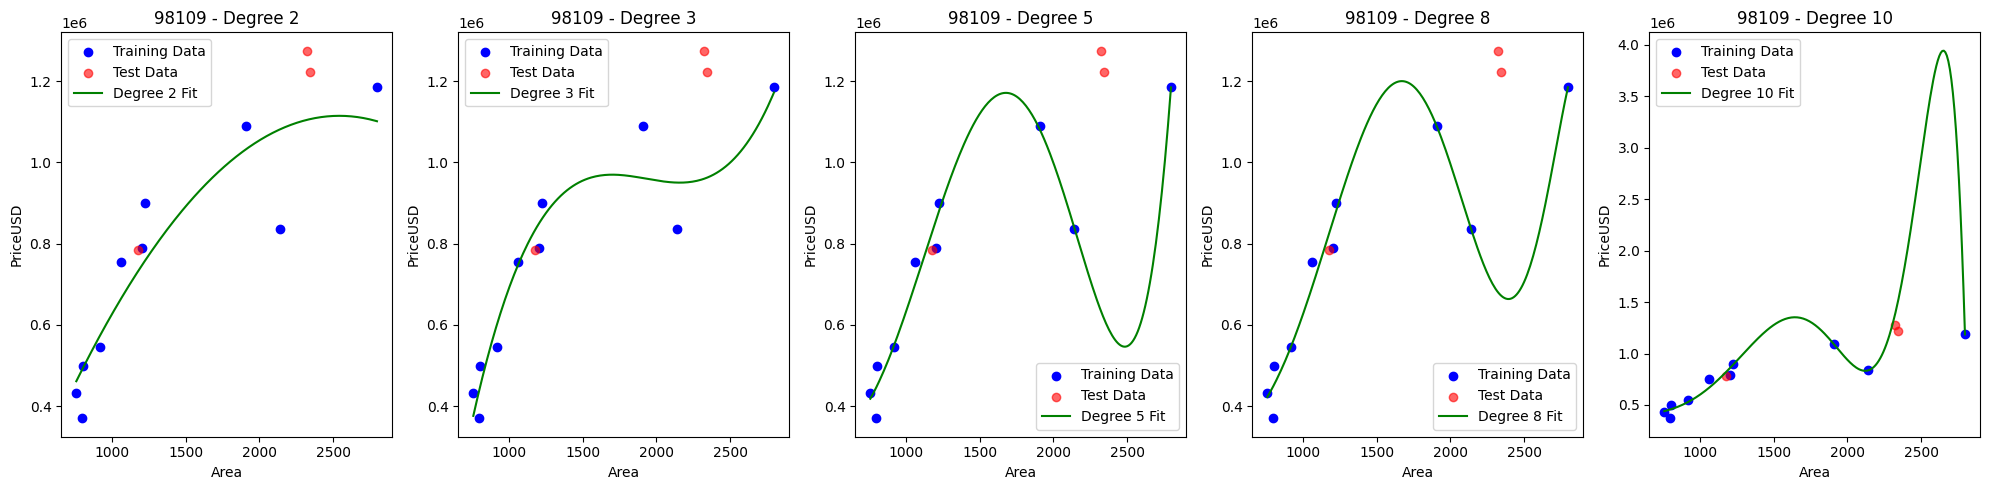

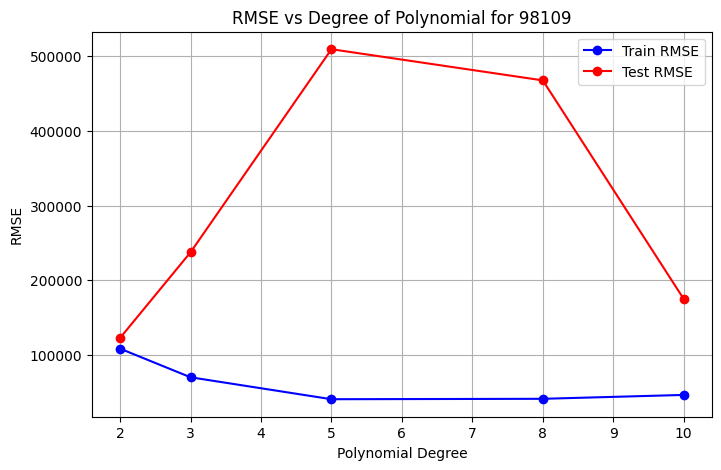

Processing zip_code: 98102


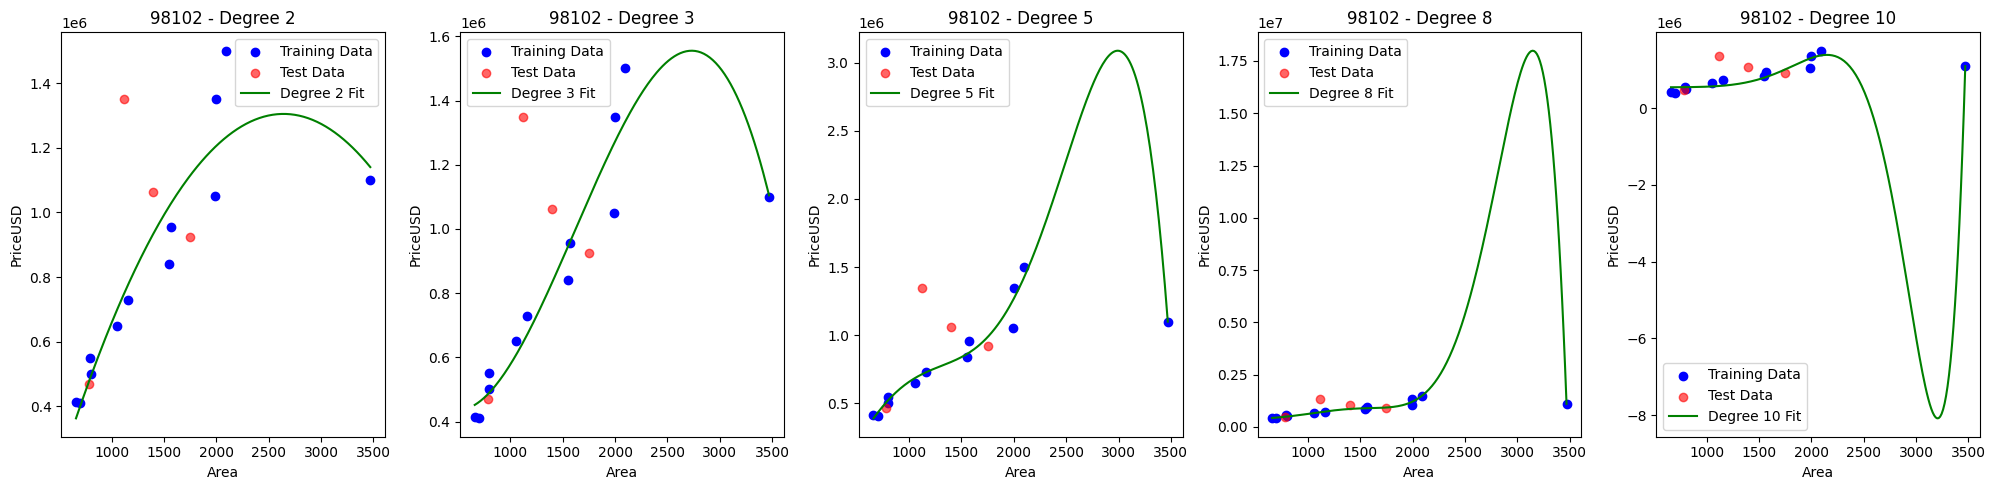

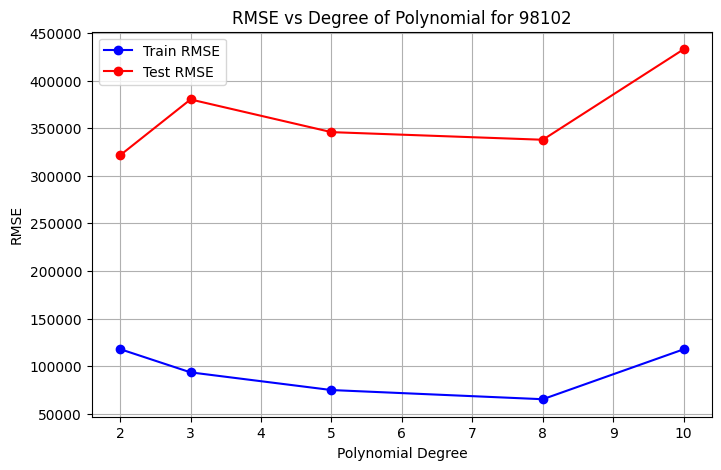

Processing zip_code: 98126


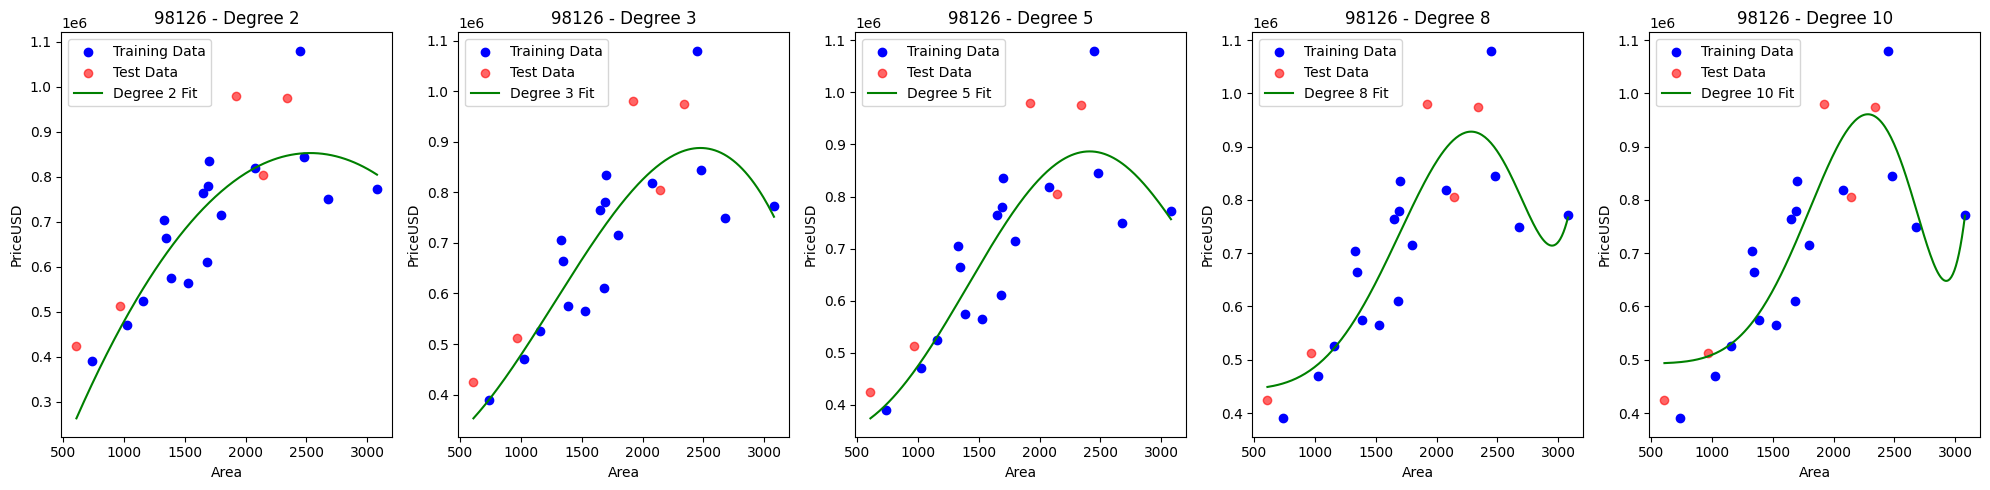

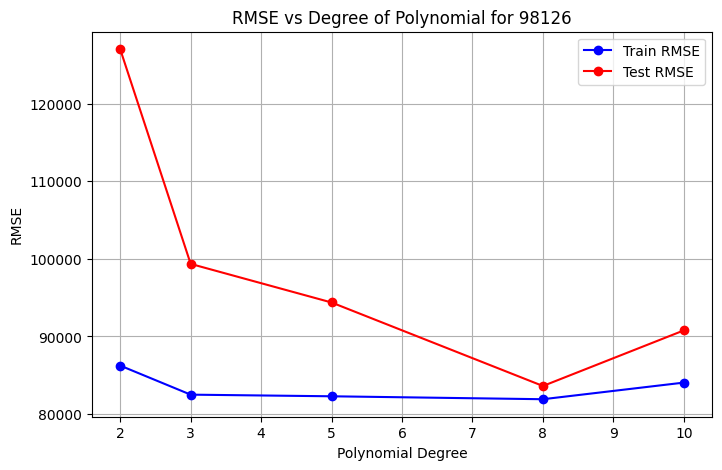

Processing zip_code: 98168


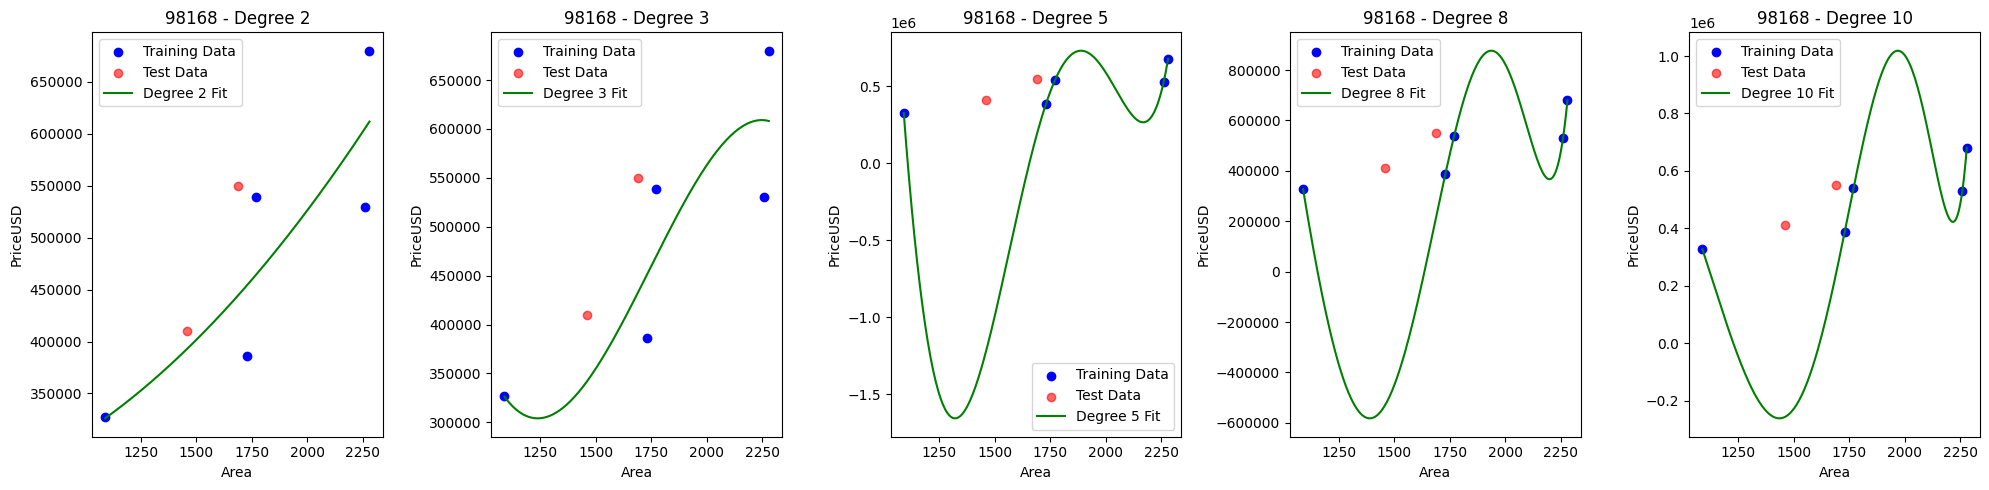

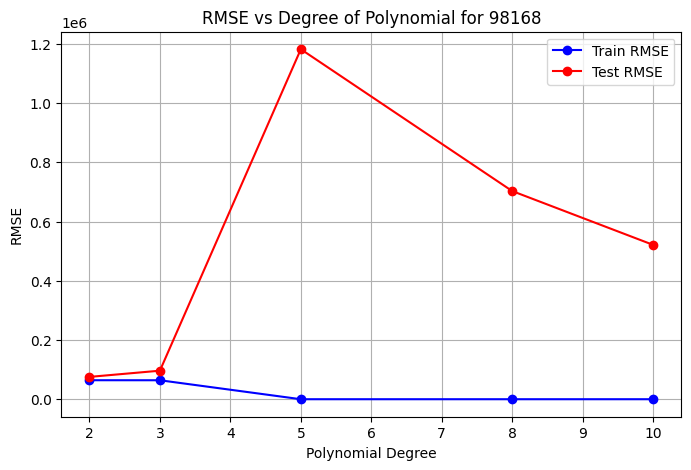

Processing zip_code: 98103


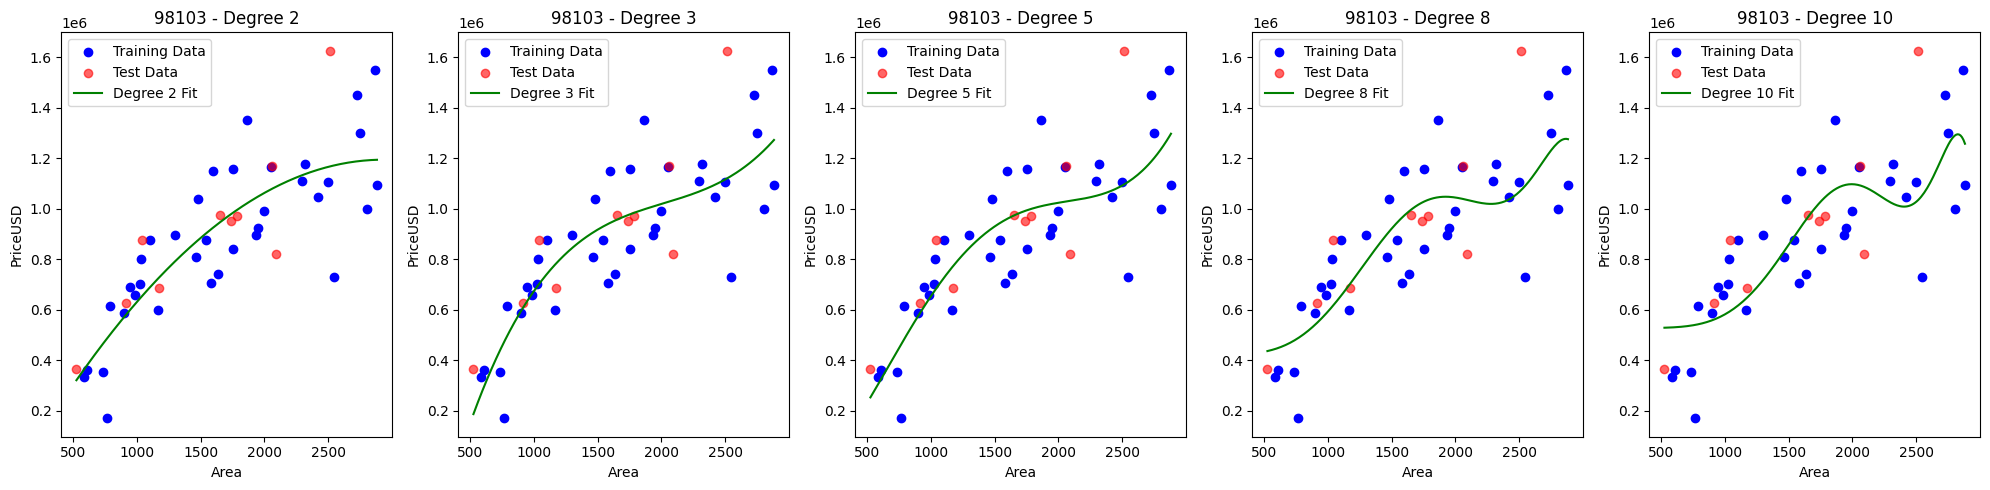

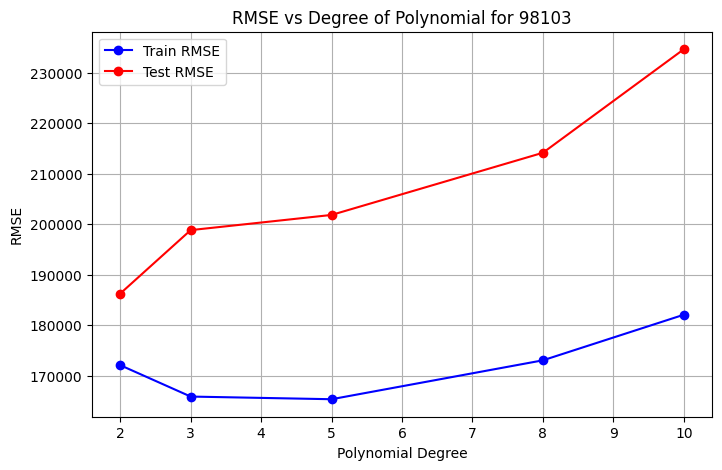

Processing zip_code: 98116


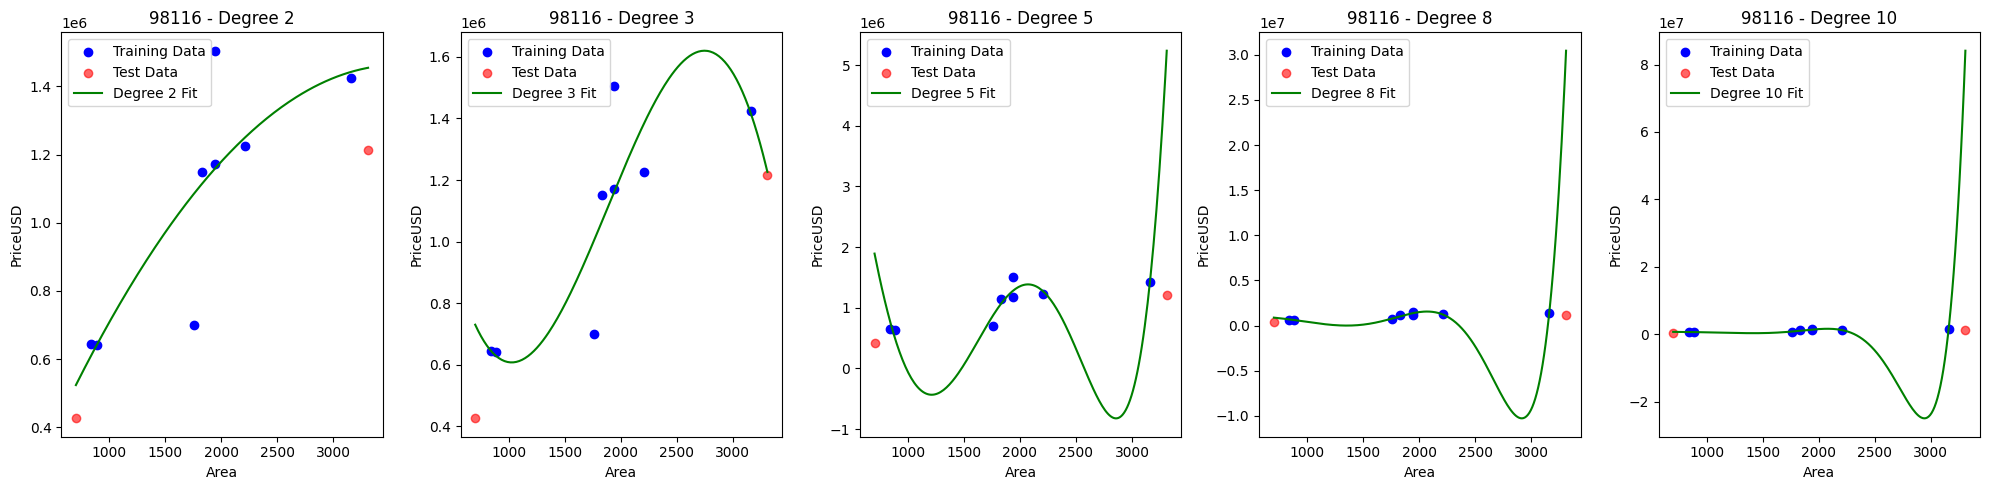

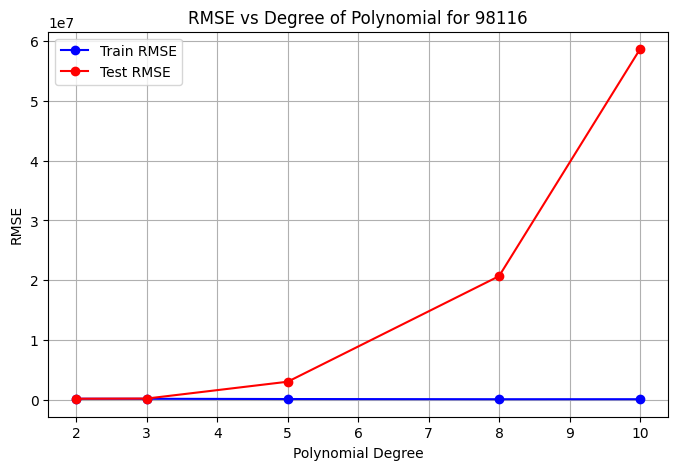

Processing zip_code: 98146


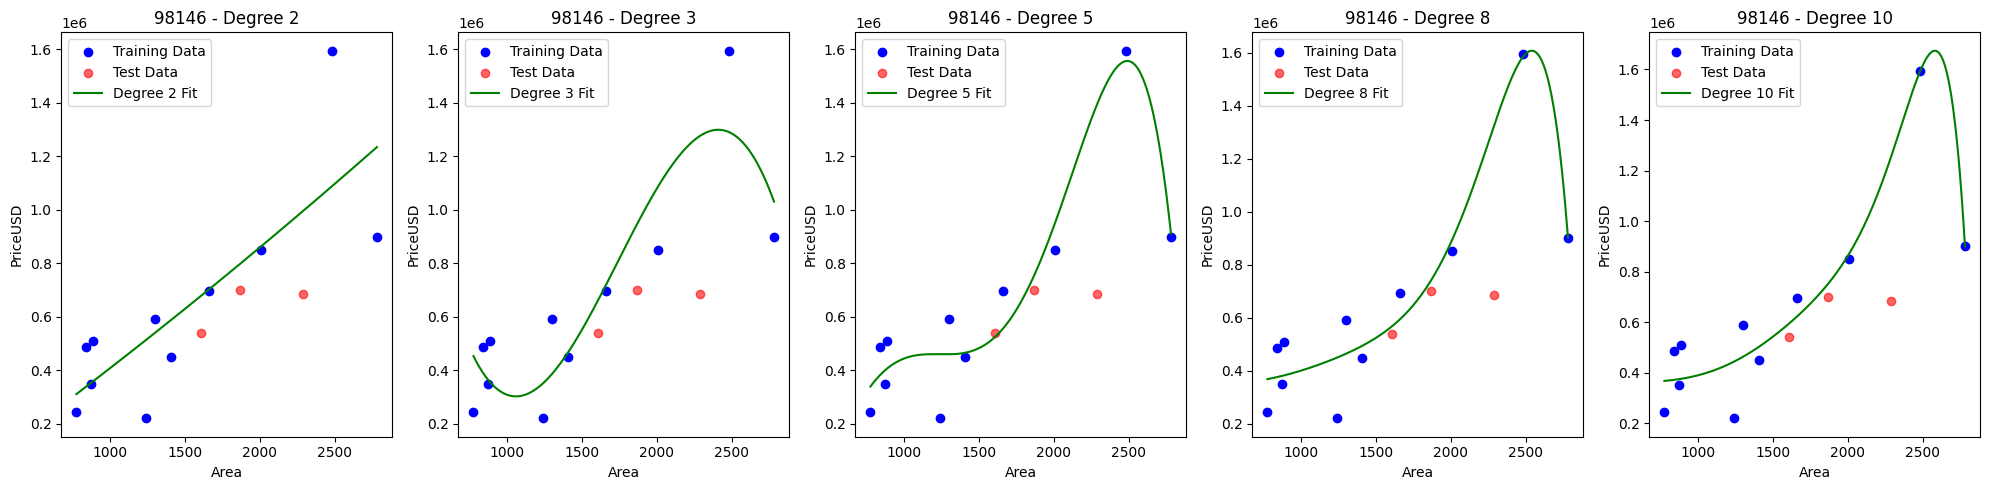

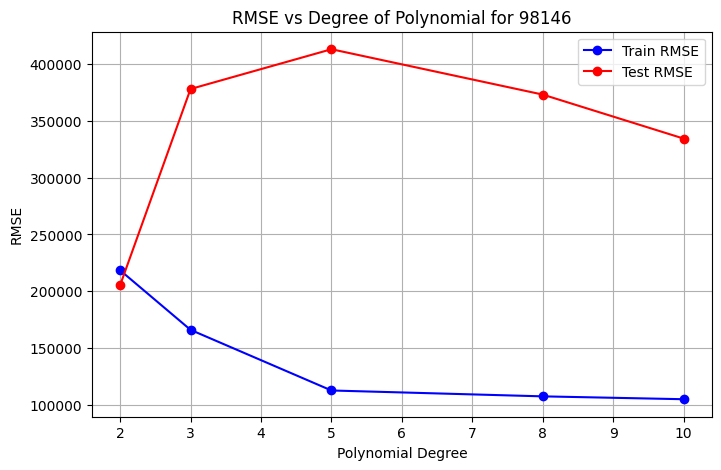

Processing zip_code: 98178


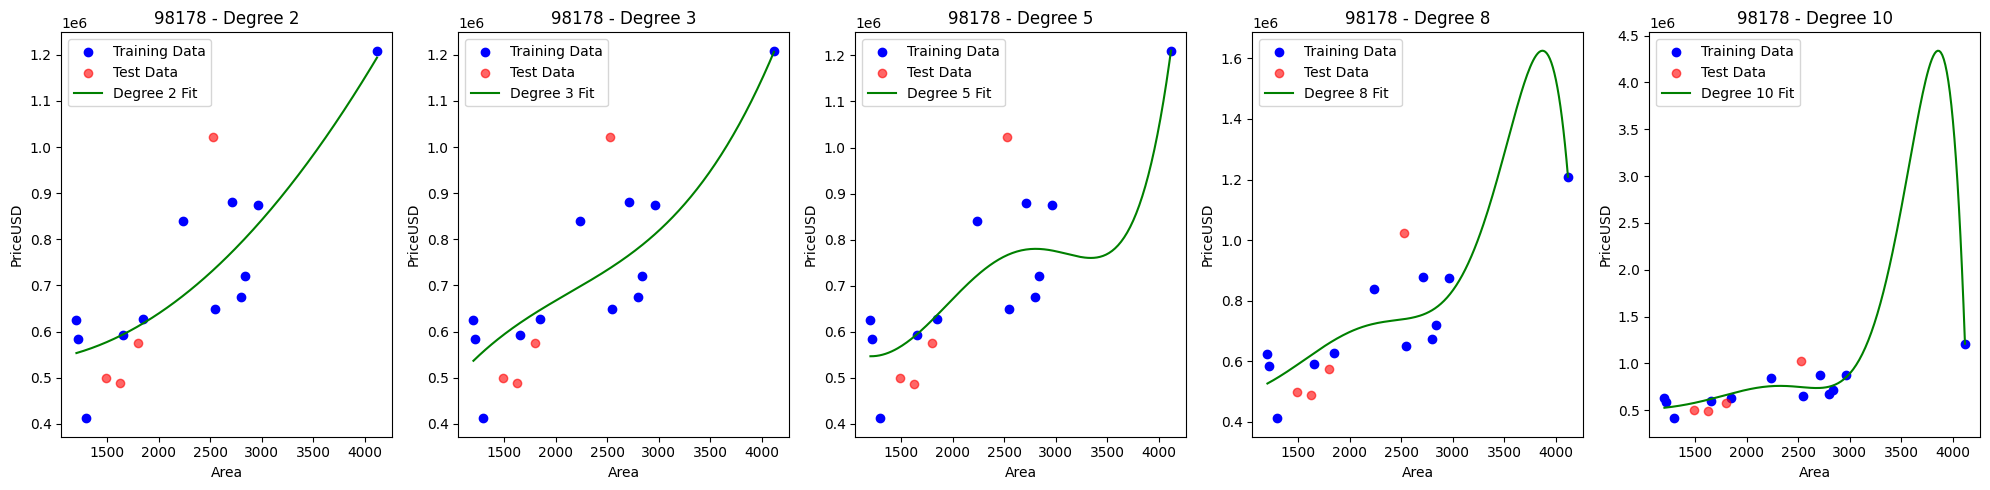

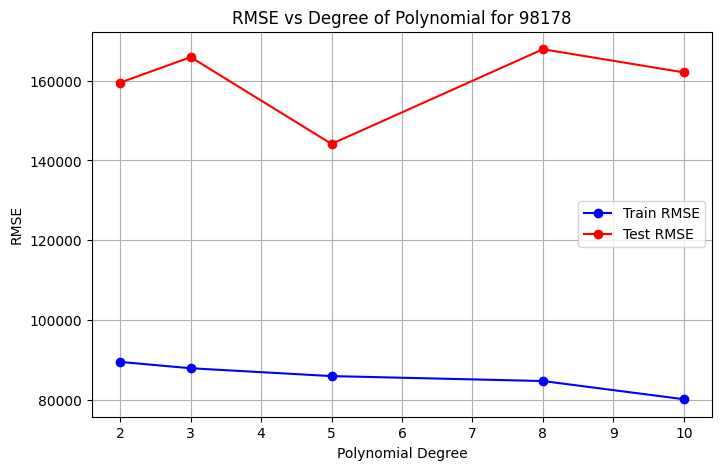

Processing zip_code: 98115


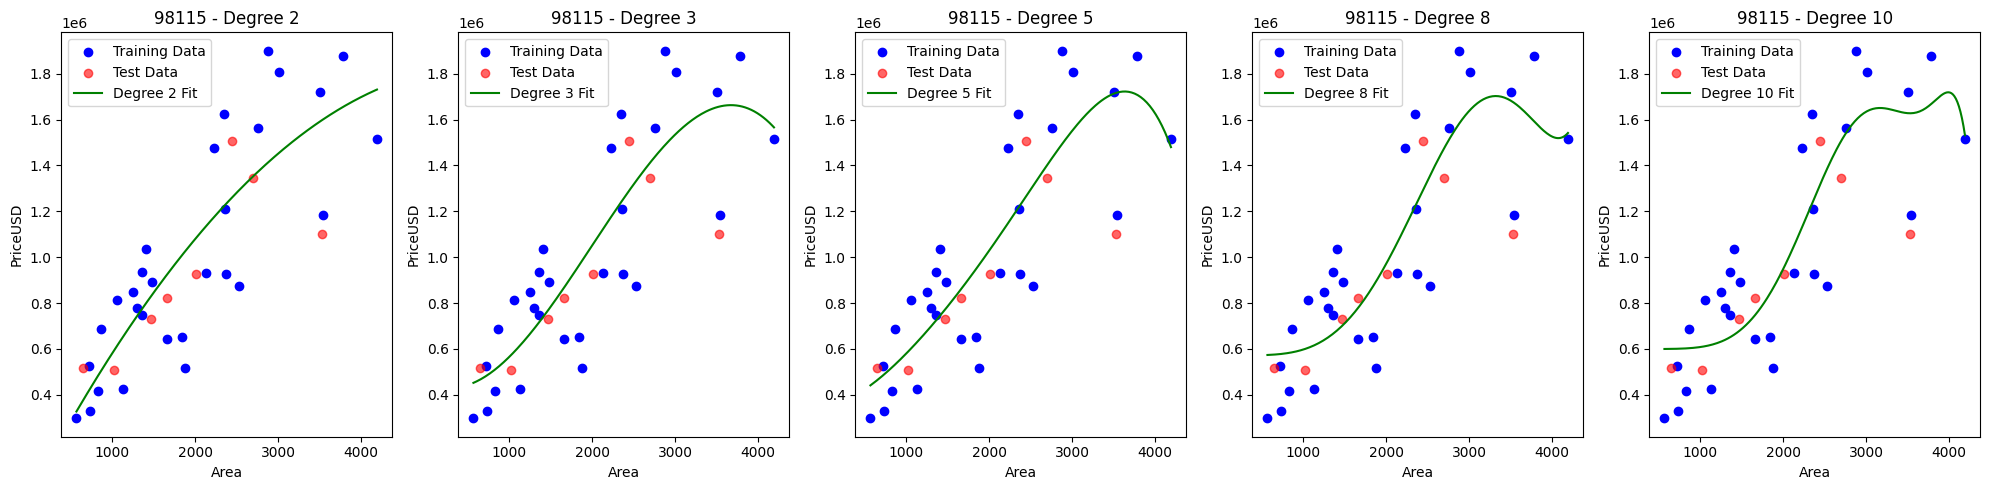

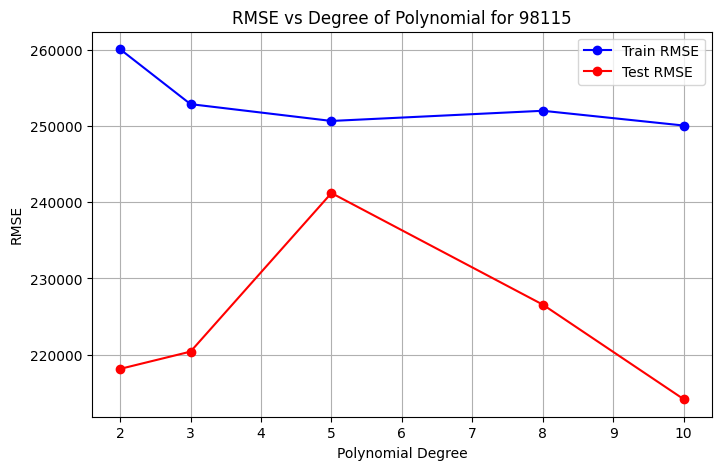

Processing zip_code: 98133


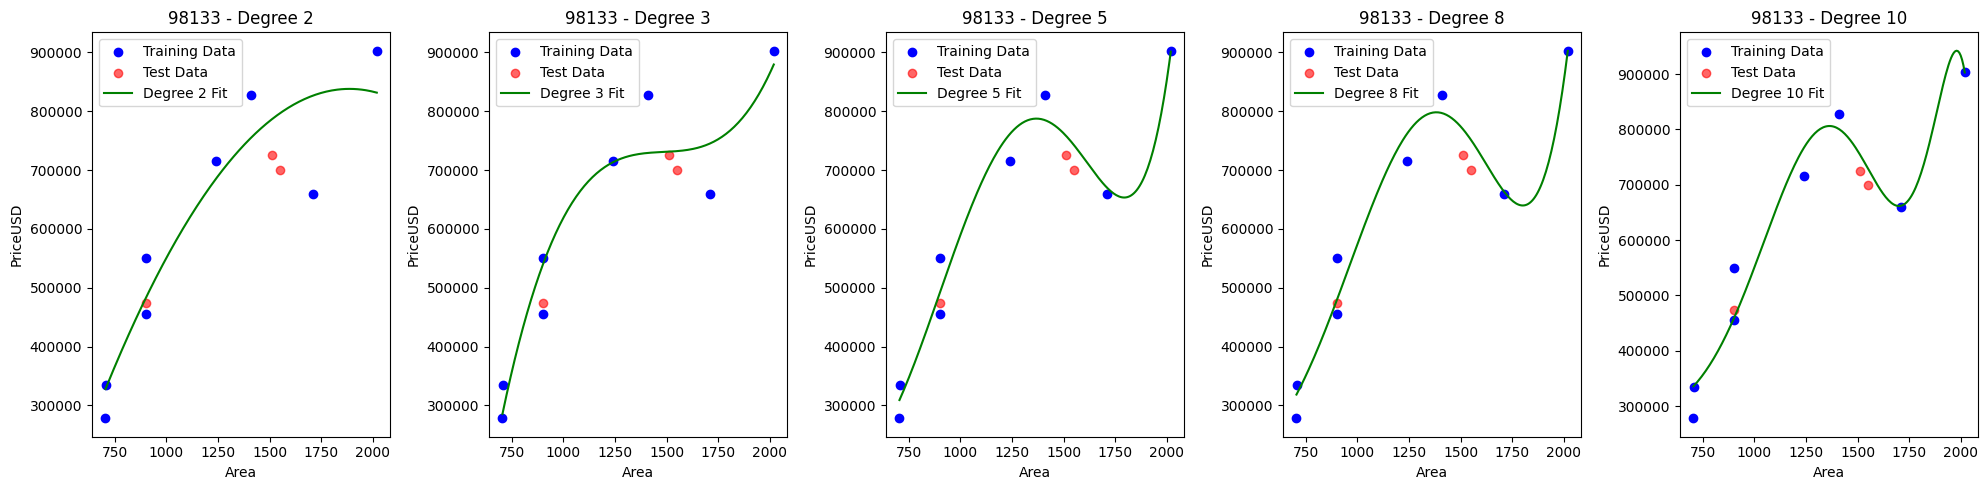

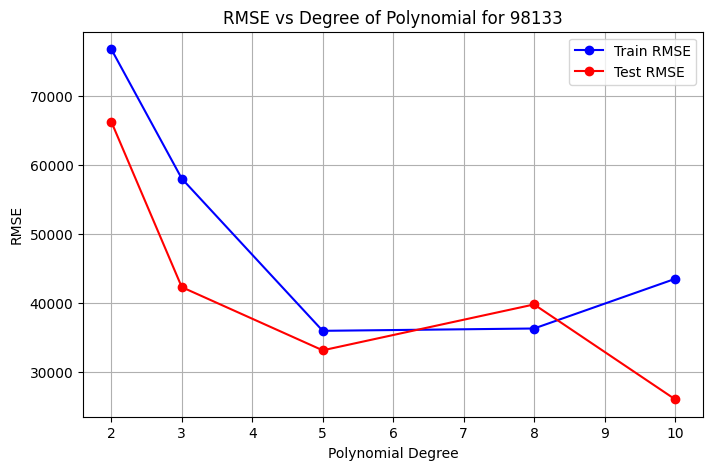

Processing zip_code: 98118


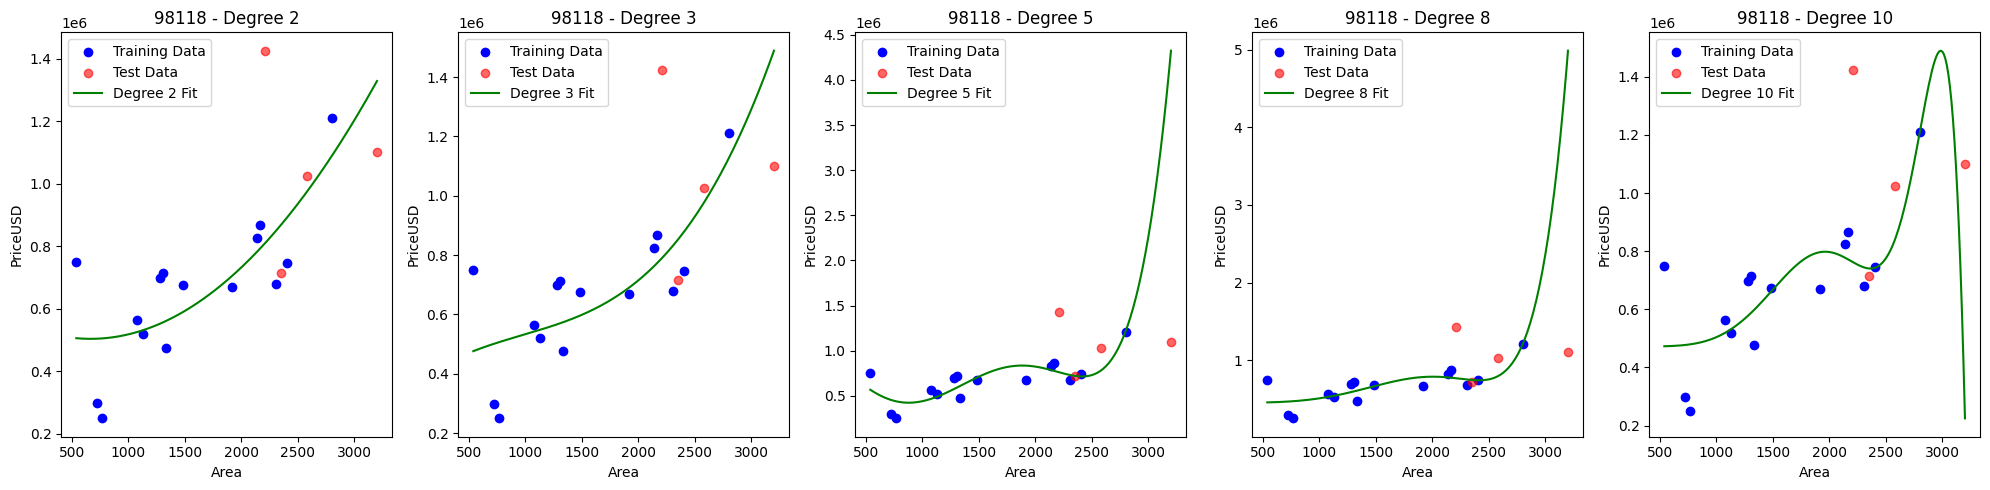

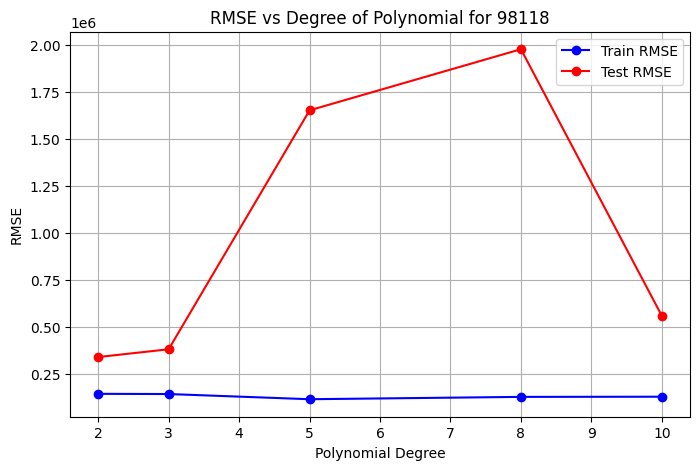

Processing zip_code: 98112


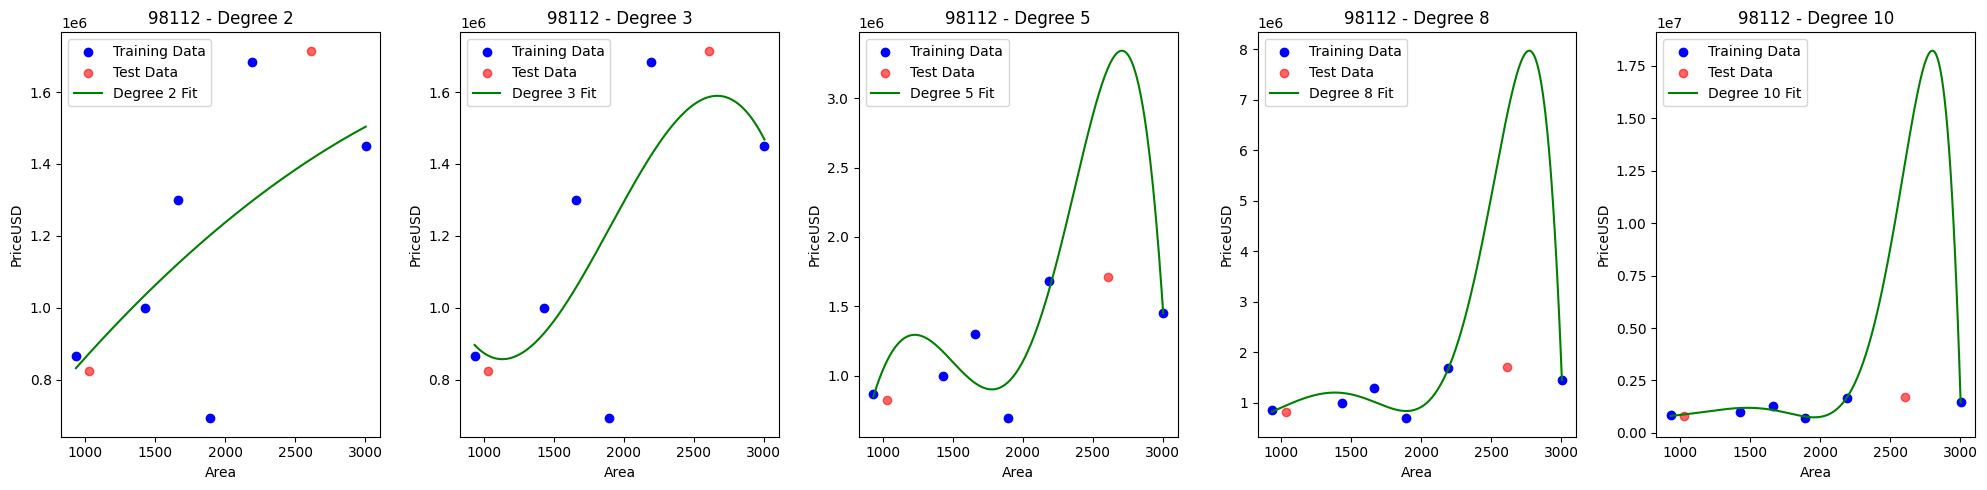

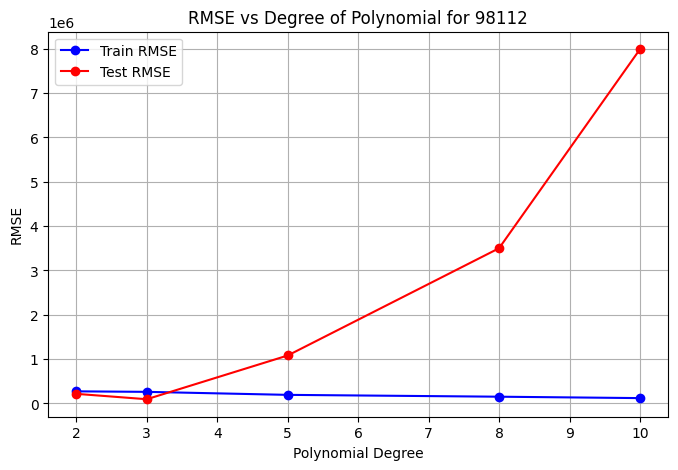

Processing zip_code: 98117


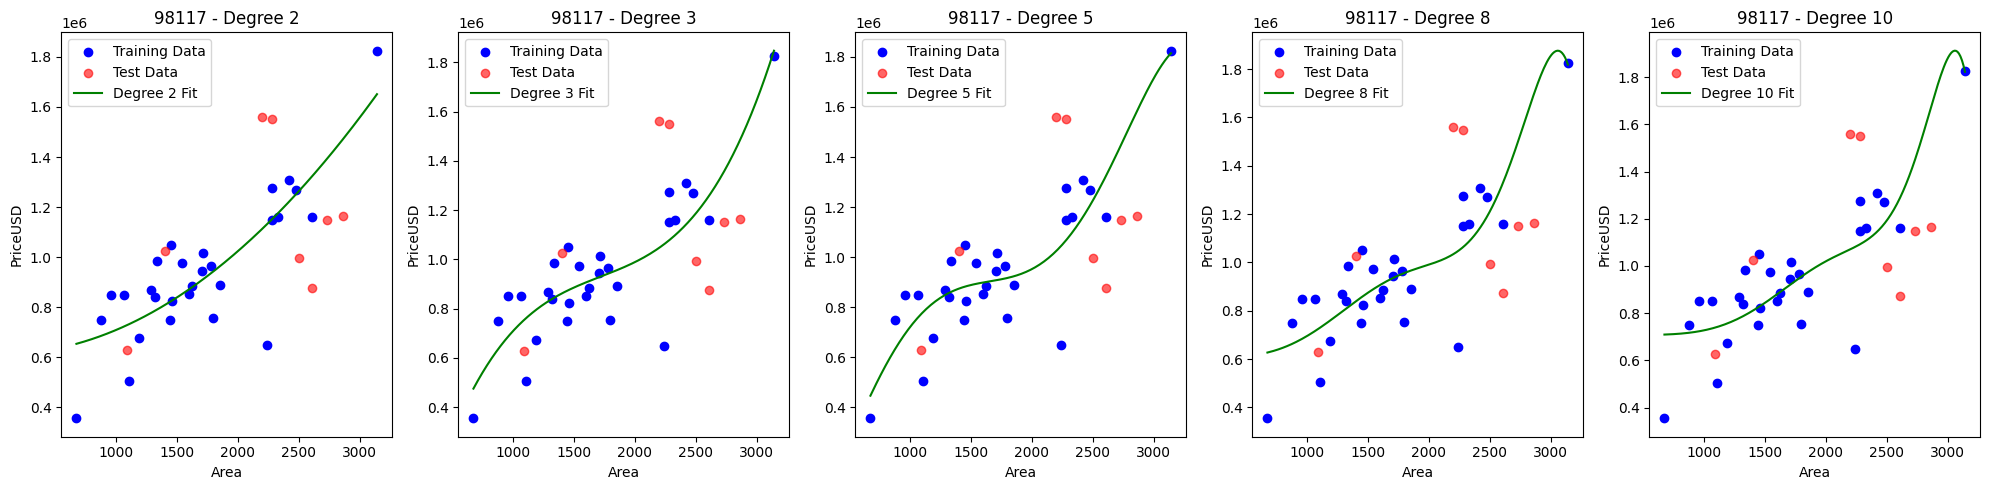

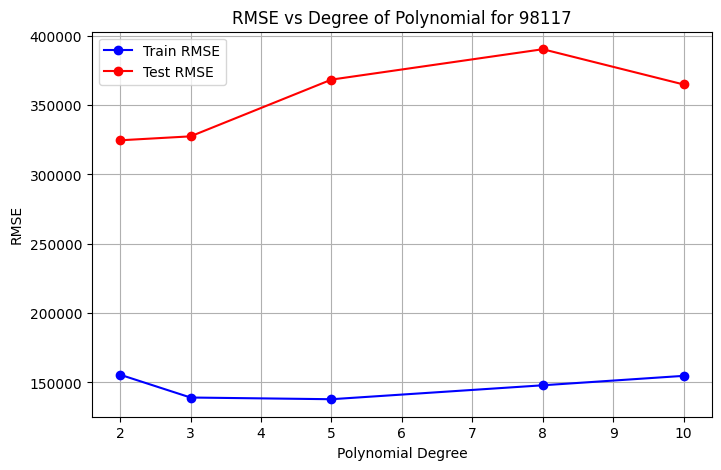

Processing zip_code: 98108


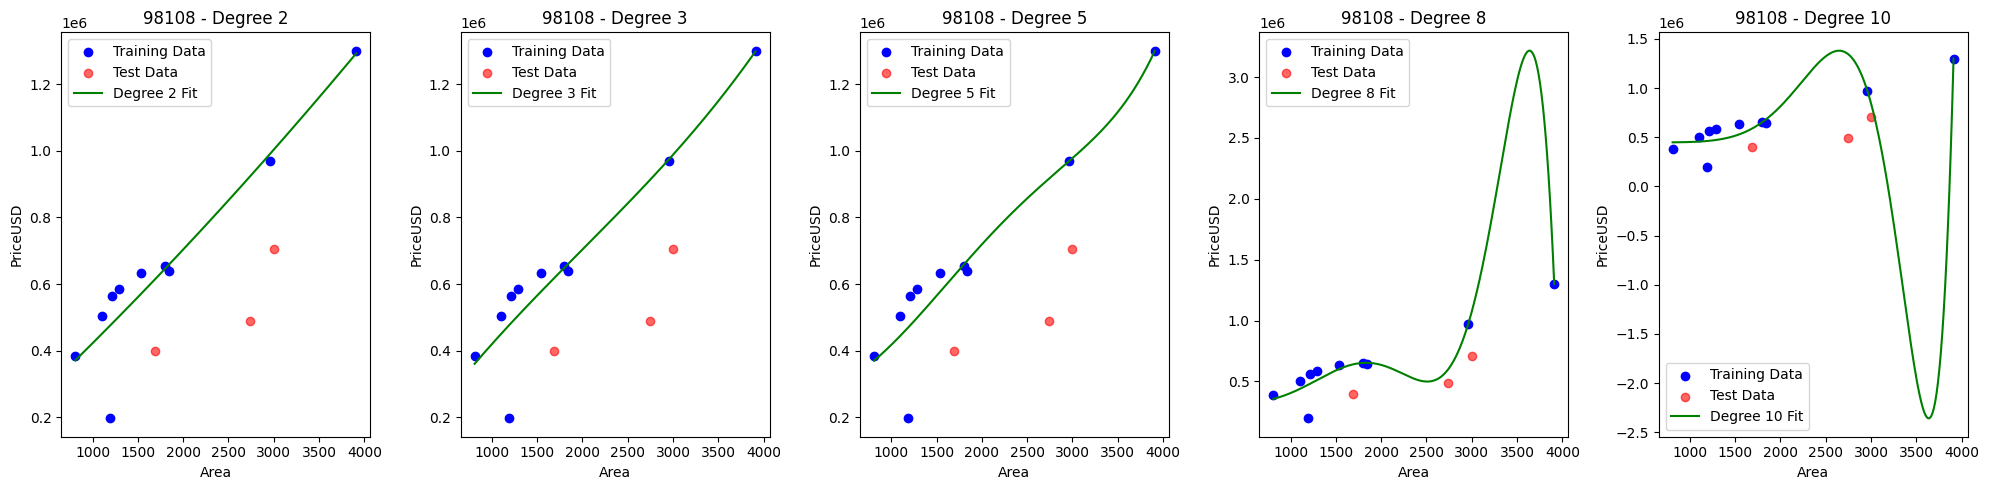

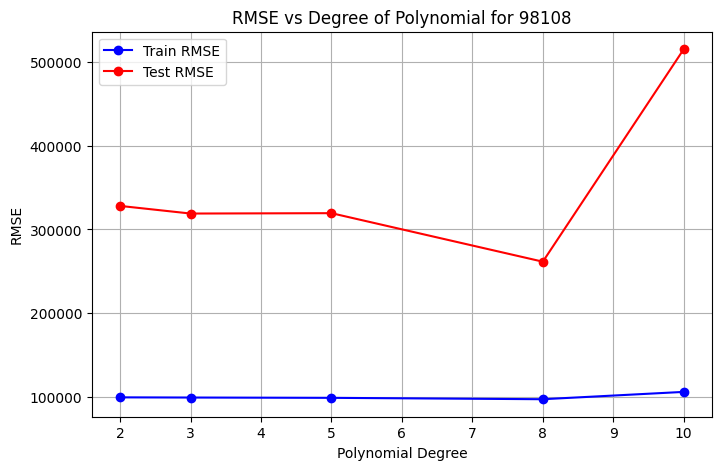

Skipping zip_code 98164 due to insufficient samples.


In [47]:
# Group by 'zip_code' and perform analysis for each region
zip_code = df_cleaned['zip_code'].unique()

for zip_code in zip_code:
    df_zip_code = df_cleaned[df_cleaned['zip_code'] == zip_code]

    # Skip if not enough data points
    if len(df_zip_code) < 2:
        print(f"Skipping zip_code {zip_code} due to insufficient samples.")
        continue

    X = df_zip_code[['size']]
    y = df_zip_code['price']

    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Skip if train or test sets are empty
    if len(X_train) < 1 or len(X_test) < 2:
        # print(f"Skipping zip_code {zip_code} due to train-test split issues.")
        continue
    else:
      print(f"Processing zip_code: {zip_code}")

    # Set polynomial degrees to evaluate
    degrees = [2, 3, 5, 8, 10]

    train_rms_errors = []
    test_rms_errors = []

    for degree in degrees:
        model = polynomial_regression(X_train, y_train, degree)

        X_train_poly = polynomial_features(X_train, degree)
        y_train_pred = model.predict(X_train_poly)

        X_test_poly = polynomial_features(X_test, degree)
        y_test_pred = model.predict(X_test_poly)

        train_rms_error = compute_rms_error(y_train, y_train_pred)
        test_rms_error = compute_rms_error(y_test, y_test_pred)

        train_rms_errors.append(train_rms_error)
        test_rms_errors.append(test_rms_error)

        # print(f"zip_code: {zip_code}, Degree {degree}: Train RMSE = {train_rms_error:.2f}, Test RMSE = {test_rms_error:.2f}")

        # Visualize Polynomial Regression for each degree
    fig, axs = plt.subplots(1, len(degrees), figsize=(20, 5))  # Create a grid for subplots

    for idx, degree in enumerate(degrees):
        model = polynomial_regression(X_train, y_train, degree)

        X_train_poly = polynomial_features(X_train, degree)
        y_train_pred = model.predict(X_train_poly)

        X_test_poly = polynomial_features(X_test, degree)
        y_test_pred = model.predict(X_test_poly)

        # Scatter plot of actual data and polynomial fit
        axs[idx].scatter(X_train, y_train, color='blue', label="Training Data")
        axs[idx].scatter(X_test, y_test, color='red', label="Test Data", alpha=0.6)
        X_fit = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
        X_fit_poly = polynomial_features(X_fit, degree)
        y_fit_pred = model.predict(X_fit_poly)
        axs[idx].plot(X_fit, y_fit_pred, label=f"Degree {degree} Fit", color='green')
        axs[idx].set_title(f"{zip_code} - Degree {degree}")
        axs[idx].set_xlabel("Area")
        axs[idx].set_ylabel("PriceUSD")
        axs[idx].legend()

    plt.tight_layout()
    plt.show()


    # Plot Train RMSE and Test RMSE vs Polynomial Degree for each zip_code
    plt.figure(figsize=(8, 5))
    plt.plot(degrees, train_rms_errors, marker='o', label='Train RMSE', color='blue')
    plt.plot(degrees, test_rms_errors, marker='o', label='Test RMSE', color='red')
    plt.title(f"RMSE vs Degree of Polynomial for {zip_code}")
    plt.xlabel("Polynomial Degree")
    plt.ylabel("RMSE")
    plt.legend()
    plt.grid(True)
    plt.show()